<a href="https://colab.research.google.com/github/namthuan2304/AI_lab1_agentAB/blob/main/Lab_5_21130556_DangNamThuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 08/04/2024**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MyDrive'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MyDrive


# Import libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from pandas import read_csv
from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, legend, grid, show
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier, plot_tree

%pylab inline
#%run Utils.ipynb
# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')


ImportError: cannot import name 'to_csv' from 'pandas' (/usr/local/lib/python3.10/dist-packages/pandas/__init__.py)

#Task 1.
For **breast cancer** dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply **SVM algorithm** to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (**Logistic Regression, Decision Tree, kNN**) based on metrics: accuracy, precision, recall, f1 measures.



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix to evaluate the accuracy of a classification:
Performance Comparison of kNN (Best K) & Logistic Regression & Decision Tree:
+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|    SVM Algorithm    | 0.956140350877193  | 0.9589883800410116 | 0.956140350877193  | 0.9554882874504246 |
| Logistic Regression | 0.9473684210526315 | 0.9474395448079658 | 0.9473684210526315 | 0.9470870627956459 |
|    kNN (Best K=5)   | 0.9385964912280702 | 0.9390013495276655 | 0.9385964912280702 | 0.9380859556298152 |
|    Decision Tree    | 0.9210526315789473 | 0.9207976506585542 | 0.9210526315789473 | 0.9208492773270942 |
+---------------------+--------------------+--------------------+--------------------+-----------------

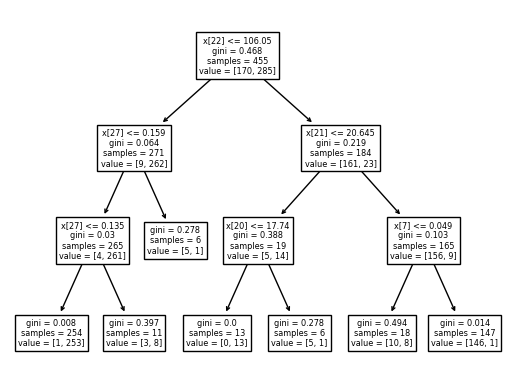

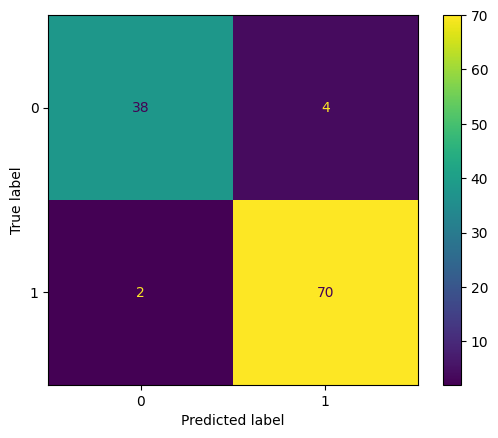

In [16]:
cancer = load_breast_cancer(as_frame=True)
rs = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cancer['data'], cancer['target'], test_size=0.2, random_state=1)
# SVM Algorithm
clf = svm.SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)
y_pred = clf.predict(Xtest)
svm_accuracy = accuracy_score(Ytest, y_pred)
svm_precision = precision_score(Ytest, y_pred, average='weighted')
svm_recall = recall_score(Ytest, y_pred, average='weighted')
svm_f1 = f1_score(Ytest, y_pred, average='weighted')
rs.add_row(["SVM Algorithm", svm_accuracy, svm_precision, svm_recall, svm_f1])

# Logistic Regression
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cancer['data'], cancer['target'], test_size=0.2, random_state=1)
logistic = LogisticRegression(random_state=1)
logistic.fit(Xtrain, Ytrain)
Ypred = logistic.predict(Xtest)
logisticAccuracy = accuracy_score(Ytest, Ypred)
logisticPrecision = precision_score(Ytest, Ypred, average='weighted')
logisticRecall = recall_score(Ytest, Ypred, average='weighted')
logisticF1 = f1_score(Ytest, Ypred, average='weighted')
rs.add_row(["Logistic Regression", logisticAccuracy, logisticPrecision, logisticRecall, logisticF1])
# print("Confusion matrix to evaluate the accuracy of a classification:\n", ConfusionMatrixDisplay.from_predictions(Ytest, Ypred))

# kNN Algorithm
kNN_Accuracy = []
kNN_Precision = []
kNN_Recall = []
kNN_F1 = []
k_values = range(3, 30, 2)

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(Xtrain, Ytrain)
    YPred = kNN.predict(Xtest)

    kNN_Accuracy.append(accuracy_score(Ytest, YPred))
    kNN_Precision.append(precision_score(Ytest, YPred, average='weighted'))
    kNN_Recall.append(recall_score(Ytest, YPred, average='weighted'))
    kNN_F1.append(f1_score(Ytest, YPred, average='weighted'))

bestK = k_values[kNN_F1.index(max(kNN_F1))]
bestK_Accuracy = kNN_Accuracy[kNN_F1.index(max(kNN_F1))]
bestK_Precision = kNN_Precision[kNN_F1.index(max(kNN_F1))]
bestK_Recall = kNN_Recall[kNN_F1.index(max(kNN_F1))]
bestK_F1 = max(kNN_F1)
rs.add_row(["kNN (Best K={})".format(bestK), bestK_Accuracy, bestK_Precision, bestK_Recall, bestK_F1])

# Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(Xtrain, Ytrain)
plot_tree(clf_model)
y_predict = clf_model.predict(Xtest)
decision_Accuracy = accuracy_score(Ytest, y_predict)
decision_Precision = precision_score(Ytest, y_predict, average='weighted')
decision_Recall = recall_score(Ytest, y_predict, average='weighted')
decision_F1 = f1_score(Ytest, y_predict, average='weighted')
rs.add_row(["Decision Tree", decision_Accuracy, decision_Precision, decision_Recall, decision_F1])

# Logistic Regression
print("Confusion matrix to evaluate the accuracy of a classification:\n", ConfusionMatrixDisplay.from_predictions(Ytest, Ypred))

# Compare the performance of selected classification algorithms (Decision Tree, kNN, and Logistic Regression) to spam detection.
print("Performance Comparison of kNN (Best K) & Logistic Regression & Decision Tree:")
print(rs)

#Task 2.

*   2.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   2.2.	Compare the obtained results in task 2.1 with **SVM** using other kernels (**Polynomial Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: **accuracy, precision, recall, f1** measures


In [19]:
iris = load_iris(as_frame=True)
rs = PrettyTable(["Kernel", "Accuracy", "Precision", "Recall", "F1 Score"])
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=1)
# kernel='linear'
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')
rs.add_row(["Linear", svm_accuracy, svm_precision, svm_recall, svm_f1])
# kernel='Polynomial'
model = svm.SVC(kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')
rs.add_row(["Polynomial", svm_accuracy, svm_precision, svm_recall, svm_f1])
# kernel='Sigmoid '
model = svm.SVC(kernel='sigmoid')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')
rs.add_row(["Sigmoid", svm_accuracy, svm_precision, svm_recall, svm_f1])
# kernel='Radial Basis Function'
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')
rs.add_row(["Radial Basis Function", svm_accuracy, svm_precision, svm_recall, svm_f1])

print("Performance Comparison of SVM")
print(rs)

Performance Comparison of SVM
+-----------------------+--------------------+---------------------+--------------------+---------------------+
|         Kernel        |      Accuracy      |      Precision      |       Recall       |       F1 Score      |
+-----------------------+--------------------+---------------------+--------------------+---------------------+
|         Linear        |        1.0         |         1.0         |        1.0         |         1.0         |
|       Polynomial      | 0.9666666666666667 |  0.9714285714285714 | 0.9666666666666667 |  0.9672820512820512 |
|        Sigmoid        |        0.2         | 0.04000000000000001 |        0.2         | 0.06666666666666667 |
| Radial Basis Function | 0.9666666666666667 |  0.9714285714285714 | 0.9666666666666667 |  0.9672820512820512 |
+-----------------------+--------------------+---------------------+--------------------+---------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Task 3.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, Logistic Regression**) and **SVM** (using different kernels) with **FASHION** dataset based on **accuracy, precision, recall, f1** measures.


In [30]:
data_train = read_csv("fashion_train.csv")
data_test = read_csv("fashion_test.csv")
rs = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
classifier_3 = LogisticRegression(random_state=1)
classifier_3.fit(data_train.drop(columns=['y']), data_train['y'])
y_pred_3 = classifier_3.predict(data_test.drop(columns=['y']))
logistic_accuracy_3 = accuracy_score(data_test[['y']], y_pred_3)
logistic_precision_3 = precision_score(data_test[['y']], y_pred_3, average='weighted')
logistic_recall_3 = recall_score(data_test[['y']], y_pred_3, average='weighted')
logistic_f1_3 = f1_score(data_test[['y']], y_pred_3, average='weighted')
rs.add_row(["Logistic Regression", logistic_accuracy_3, logistic_precision_3, logistic_recall_3, logistic_f1_3])

# Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(data_train.drop(columns=['y']), data_train['y'])
#plot_tree(clf_model)
y_predict = clf_model.predict(data_test.drop(columns=['y']))
decision_Accuracy = accuracy_score(data_test[['y']], y_predict)
decision_Precision = precision_score(data_test[['y']], y_predict, average='weighted')
decision_Recall = recall_score(data_test[['y']], y_predict, average='weighted')
decision_F1 = f1_score(data_test[['y']], y_predict, average='weighted')
rs.add_row(["Decision Tree", decision_Accuracy, decision_Precision, decision_Recall, decision_F1])

# kNN Algorithm
kNN_Accuracy = []
kNN_Precision = []
kNN_Recall = []
kNN_F1 = []
k_values = range(3, 30, 2)

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(data_train.drop(columns=['y']), data_train['y'])
    YPred = kNN.predict(data_test.drop(columns=['y']))

    kNN_Accuracy.append(accuracy_score(data_test[['y']], YPred))
    kNN_Precision.append(precision_score(data_test[['y']], YPred, average='weighted'))
    kNN_Recall.append(recall_score(data_test[['y']], YPred, average='weighted'))
    kNN_F1.append(f1_score(data_test[['y']], YPred, average='weighted'))

bestK = k_values[kNN_F1.index(max(kNN_F1))]
bestK_Accuracy = kNN_Accuracy[kNN_F1.index(max(kNN_F1))]
bestK_Precision = kNN_Precision[kNN_F1.index(max(kNN_F1))]
bestK_Recall = kNN_Recall[kNN_F1.index(max(kNN_F1))]
bestK_F1 = max(kNN_F1)
rs.add_row(["kNN (Best K={})".format(bestK), bestK_Accuracy, bestK_Precision, bestK_Recall, bestK_F1])

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(data_train.drop(columns=['y']), data_train['y'])
y_pred = clf.predict(data_test.drop(columns=['y']))
svm_accuracy = accuracy_score(data_test[['y']], y_pred)
svm_precision = precision_score(data_test[['y']], y_pred, average='weighted')
svm_recall = recall_score(data_test[['y']], y_pred, average='weighted')
svm_f1 = f1_score(data_test[['y']], y_pred, average='weighted')
rs.add_row(["SVM", svm_accuracy, svm_precision, svm_recall, svm_f1])

print("Performance Comparison of SVM")
print(rs)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Comparison of SVM
+---------------------+----------+---------------------+--------+--------------------+
|        Model        | Accuracy |      Precision      | Recall |      F1 Score      |
+---------------------+----------+---------------------+--------+--------------------+
| Logistic Regression |   0.79   |  0.7947465025148702 |  0.79  | 0.7905529748954693 |
|    Decision Tree    |  0.464   | 0.38470709279433607 | 0.464  | 0.3748159979149567 |
|    kNN (Best K=5)   |  0.761   |  0.7849144007407373 | 0.761  | 0.7607265009517986 |
|         SVM         |  0.809   |  0.8172738994980449 | 0.809  | 0.8089067574598489 |
+---------------------+----------+---------------------+--------+--------------------+


#Task 4.
For a given mobile price classification dataset with the following information:

*   **Attributes**: 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',     'touch_screen', 'wifi'
*   **class label**: ***price_range*** (0,1,2,3)



#Task 4.1.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, Logistic Regression**) and **SVM** (using different kernels) with **mobile price classification** based on **accuracy, precision, recall, f1** measures.

In [64]:
data_train = read_csv("mobile_train.csv")
rs = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_train.drop(columns=['price_range']), data_train['price_range'], test_size=0.2, random_state=1)

# SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Ytrain)
y_pred = clf.predict(Xtest)
svm_accuracy = accuracy_score(Ytest, y_pred)
svm_precision = precision_score(Ytest, y_pred, average='weighted')
svm_recall = recall_score(Ytest, y_pred, average='weighted')
svm_f1 = f1_score(Ytest, y_pred, average='weighted')
rs.add_row(["SVM", svm_accuracy, svm_precision, svm_recall, svm_f1])

# Logistic Regression
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, Ytrain)
Ypred = logistic.predict(Xtest)
logisticAccuracy = accuracy_score(Ytest, Ypred)
logisticPrecision = precision_score(Ytest, Ypred, average='weighted')
logisticRecall = recall_score(Ytest, Ypred, average='weighted')
logisticF1 = f1_score(Ytest, Ypred, average='weighted')
rs.add_row(["Logistic Regression", logisticAccuracy, logisticPrecision, logisticRecall, logisticF1])

# kNN Algorithm
kNN_Accuracy = []
kNN_Precision = []
kNN_Recall = []
kNN_F1 = []
k_values = range(3, 30, 2)

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(Xtrain, Ytrain)
    YPred = kNN.predict(Xtest)

    kNN_Accuracy.append(accuracy_score(Ytest, YPred))
    kNN_Precision.append(precision_score(Ytest, YPred, average='weighted'))
    kNN_Recall.append(recall_score(Ytest, YPred, average='weighted'))
    kNN_F1.append(f1_score(Ytest, YPred, average='weighted'))

bestK = k_values[kNN_F1.index(max(kNN_F1))]
bestK_Accuracy = kNN_Accuracy[kNN_F1.index(max(kNN_F1))]
bestK_Precision = kNN_Precision[kNN_F1.index(max(kNN_F1))]
bestK_Recall = kNN_Recall[kNN_F1.index(max(kNN_F1))]
bestK_F1 = max(kNN_F1)
rs.add_row(["kNN (Best K={})".format(bestK), bestK_Accuracy, bestK_Precision, bestK_Recall, bestK_F1])

# Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(Xtrain, Ytrain)
#plot_tree(clf_model)
y_predict = clf_model.predict(Xtest)
decision_Accuracy = accuracy_score(Ytest, y_predict)
decision_Precision = precision_score(Ytest, y_predict, average='weighted')
decision_Recall = recall_score(Ytest, y_predict, average='weighted')
decision_F1 = f1_score(Ytest, y_predict, average='weighted')
rs.add_row(["Decision Tree", decision_Accuracy, decision_Precision, decision_Recall, decision_F1])
print(rs)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+----------+--------------------+--------+--------------------+
|        Model        | Accuracy |     Precision      | Recall |      F1 Score      |
+---------------------+----------+--------------------+--------+--------------------+
|         SVM         |  0.9425  | 0.9427572317128012 | 0.9425 | 0.9424508195837694 |
| Logistic Regression |  0.615   | 0.6129593039691562 | 0.615  | 0.6131894673969207 |
|    kNN (Best K=9)   |  0.925   | 0.9268144747464437 | 0.925  | 0.9252001630922513 |
|    Decision Tree    |   0.74   | 0.7494964700352109 |  0.74  | 0.7413594465823712 |
+---------------------+----------+--------------------+--------+--------------------+


#Task 4.2.
Predict class label for test set using the best model found in task 4.1

In [65]:
data_test = read_csv("mobile_test.csv")
y_pred = clf.predict(data_test.drop(columns='id'))
data_test['price_range'] = y_pred
data_test.to_csv("mobile_test.csv", index=False)
data_test

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price_range


#Task 5.

*   5.1.	Perform SVM algorithm to **spambase dataset** using **linear kernel**.
*   5.2.	Compare the obtained results in task 5.1 with **SVM** using other kernels (**Polynomial Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: **accuracy, precision, recall, f1** measures

In [ ]:
mails = read_csv("spambase.csv")
rs = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(mails.drop(columns=['class']), mails['class'], test_size=0.2, random_state=1)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)
y_pred = clf.predict(Xtest)
svm_accuracy = accuracy_score(Ytest, y_pred)
svm_precision = precision_score(Ytest, y_pred, average='weighted')
svm_recall = recall_score(Ytest, y_pred, average='weighted')
svm_f1 = f1_score(Ytest, y_pred, average='weighted')
rs.add_row(["SVM Algorithm", svm_accuracy, svm_precision, svm_recall, svm_f1])

# Logistic Regression

logistic = LogisticRegression(random_state=1)
logistic.fit(Xtrain, Ytrain)
Ypred = logistic.predict(Xtest)
logisticAccuracy = accuracy_score(Ytest, Ypred)
logisticPrecision = precision_score(Ytest, Ypred, average='weighted')
logisticRecall = recall_score(Ytest, Ypred, average='weighted')
logisticF1 = f1_score(Ytest, Ypred, average='weighted')
rs.add_row(["Logistic Regression", logisticAccuracy, logisticPrecision, logisticRecall, logisticF1])
# print("Confusion matrix to evaluate the accuracy of a classification:\n", ConfusionMatrixDisplay.from_predictions(Ytest, Ypred))

# kNN Algorithm
kNN_Accuracy = []
kNN_Precision = []
kNN_Recall = []
kNN_F1 = []
k_values = range(3, 30, 2)

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(Xtrain, Ytrain)
    YPred = kNN.predict(Xtest)

    kNN_Accuracy.append(accuracy_score(Ytest, YPred))
    kNN_Precision.append(precision_score(Ytest, YPred, average='weighted'))
    kNN_Recall.append(recall_score(Ytest, YPred, average='weighted'))
    kNN_F1.append(f1_score(Ytest, YPred, average='weighted'))

bestK = k_values[kNN_F1.index(max(kNN_F1))]
bestK_Accuracy = kNN_Accuracy[kNN_F1.index(max(kNN_F1))]
bestK_Precision = kNN_Precision[kNN_F1.index(max(kNN_F1))]
bestK_Recall = kNN_Recall[kNN_F1.index(max(kNN_F1))]
bestK_F1 = max(kNN_F1)
rs.add_row(["kNN (Best K={})".format(bestK), bestK_Accuracy, bestK_Precision, bestK_Recall, bestK_F1])

# Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(Xtrain, Ytrain)
plot_tree(clf_model)
y_predict = clf_model.predict(Xtest)
decision_Accuracy = accuracy_score(Ytest, y_predict)
decision_Precision = precision_score(Ytest, y_predict, average='weighted')
decision_Recall = recall_score(Ytest, y_predict, average='weighted')
decision_F1 = f1_score(Ytest, y_predict, average='weighted')
rs.add_row(["Decision Tree", decision_Accuracy, decision_Precision, decision_Recall, decision_F1])

# Logistic Regression
print("Confusion matrix to evaluate the accuracy of a classification:\n", ConfusionMatrixDisplay.from_predictions(Ytest, Ypred))

# Compare the performance of selected classification algorithms (Decision Tree, kNN, and Logistic Regression) to spam detection.
print("Performance Comparison of kNN (Best K) & Logistic Regression & Decision Tree:")
print(rs)

#Finally,
Save a copy in your Github. Remember renaming the notebook.